In [42]:
import numpy as np
import pandas as pd

In [43]:
df=pd.read_csv("fert_pred.csv")

In [44]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [45]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [46]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [48]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [49]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [50]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

<AxesSubplot:xlabel='Fertilizer Name', ylabel='count'>

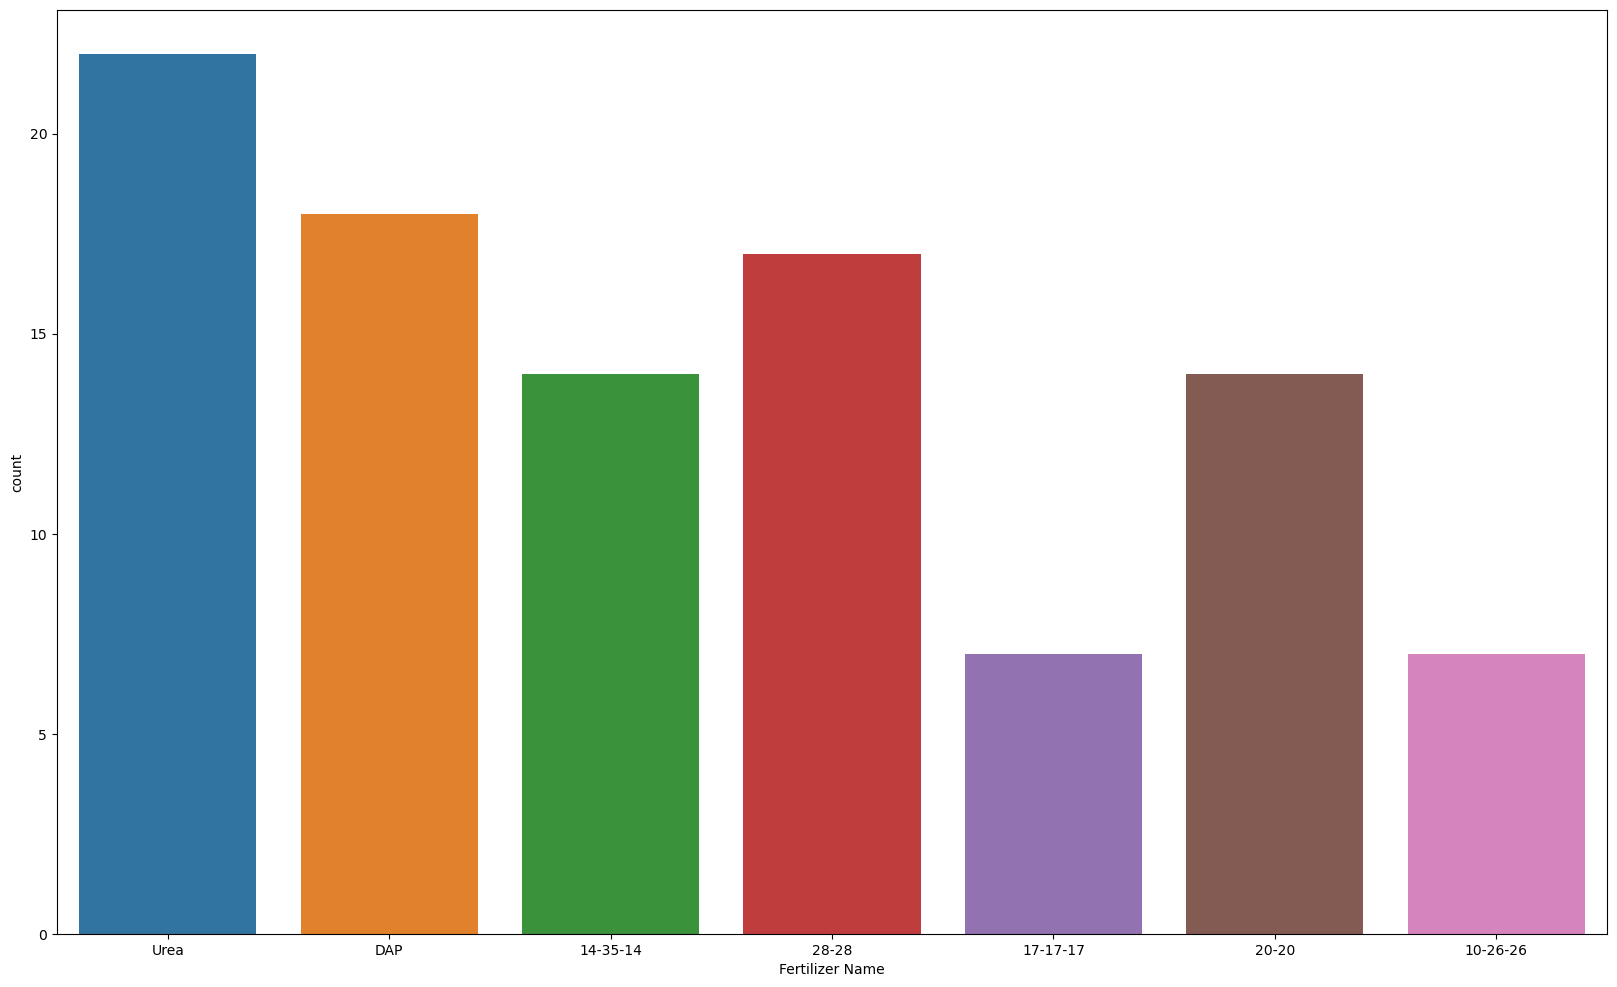

In [51]:
import seaborn as sn
import matplotlib.pyplot 
matplotlib.pyplot.figure(figsize=(20,12))
sn.countplot(x='Fertilizer Name',data=df)

In [52]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [53]:
df['Soil Type']= df['Soil Type'].replace({'Sandy': 0, 'Loamy' : 1, 'Black' : 2, 'Red' : 3, 'Clayey': 4})
df['Soil Type']= pd.to_numeric(df['Soil Type'])

In [54]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0,Maize,37,0,0,Urea
1,29,52,45,1,Sugarcane,12,0,36,DAP
2,34,65,62,2,Cotton,7,9,30,14-35-14
3,32,62,34,3,Tobacco,22,0,20,28-28
4,28,54,46,4,Paddy,35,0,0,Urea


In [55]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [56]:
df['Crop Type']=df['Crop Type'].replace({'Maize' : 0, 'Sugarcane' : 1, 'Cotton' : 2, 'Tobacco' : 3, 'Paddy' : 4, 'Barley' : 5,
       'Wheat' : 6 , 'Millets' : 7, 'Oil seeds' : 8, 'Pulses' : 9 , 'Ground Nuts' : 10})
df['Crop Type']= pd.to_numeric(df['Crop Type'])

In [57]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0,0,37,0,0,Urea
1,29,52,45,1,1,12,0,36,DAP
2,34,65,62,2,2,7,9,30,14-35-14
3,32,62,34,3,3,22,0,20,28-28
4,28,54,46,4,4,35,0,0,Urea


In [58]:
df['Crop Type']

0     0
1     1
2     2
3     3
4     4
     ..
94    9
95    3
96    6
97    7
98    1
Name: Crop Type, Length: 99, dtype: int64

In [59]:
df_group=df.groupby(['Soil Type','Crop Type']).size().reset_index().rename(columns={0:'Count'})
df_group

,Soil Type,Crop Type,Count
0,0,0,6
1,0,5,7
2,0,7,7
3,1,1,9
4,1,2,3
5,1,6,9
6,2,1,4
7,2,2,4
8,2,7,4
9,2,8,7


In [60]:
x = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [61]:
x.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,0,0,37,0,0
1,29,52,45,1,1,12,0,36
2,34,65,62,2,2,7,9,30
3,32,62,34,3,3,22,0,20
4,28,54,46,4,4,35,0,0


In [62]:
y.head()

0        Urea
1         DAP
2    14-35-14
3       28-28
4        Urea
Name: Fertilizer Name, dtype: object

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle = True,random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [65]:
x_train[0]

array([-1.50323411, -1.54242294, -1.00710689,  1.42714798,  1.2748195 ,
        0.46072126, -0.57643157,  0.09092764])

In [66]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators=100, criterion = 'gini' , random_state=42)

In [67]:
cl.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred = cl.predict(x_test)

In [69]:
y_pred

array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', '17-17-17', 'DAP', '14-35-14', '14-35-14', 'Urea',
       '17-17-17', 'DAP'], dtype=object)

In [70]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [71]:
pred_rand = rand.predict(x_test)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         7
        Urea       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best score :  0.9710144927536232
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [73]:
import pickle
pickle_out = open('classifier1.pkl', 'wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [76]:
model = pickle.load(open('classifier1.pkl', 'rb'))
ans = model.predict([[34,65,62,2,2,7,9,30]])
ans[0]

'Urea'